# Programming Assignment 3 - Logistic Regression (50 points)


## In this assignment:

You'll employ gradient ascent to determine weights for a logistic regression problem focused on diagnosing breast cancer.

### Dataset Overview:

The **Breast Cancer Wisconsin dataset** is a widely-recognized collection of features manually recorded by physicians from fine needle aspiration samples. The primary objective is to determine whether the cells are benign or malignant based on these features. 

**Dataset details:** [Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin)

Each sample from the dataset is derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. These images are processed to extract characteristics of cell nuclei, which are instrumental in the diagnostic process.

### Features:

The dataset consists of ten real-valued features that provide various measurements related to the cell nucleus:

1. **Radius:** Mean of distances from the center to points on the perimeter.
2. **Texture:** Standard deviation of gray-scale values.
3. **Perimeter**
4. **Area**
5. **Smoothness:** Local variation in radius lengths.
6. **Compactness:** \( \frac{\text{perimeter}^2}{\text{area}} - 1.0 \)
7. **Concavity:** Severity of concave portions of the contour.
8. **Concave Points:** Number of concave portions of the contour.
9. **Symmetry**
10. **Fractal Dimension:** "Coastline approximation" - 1.

### Task:

Your mission is to use logistic regression on the provided features to predict whether a tumor is benign or malignant. Successfully doing so can greatly aid in early diagnosis, ultimately leading to saved lives.


## Before you start

For this semester, the teaching staff of this course will be using Autograder to grade programming assignment. Here are three things we would like you to know before starting. `PLEASE READ CAREFULLY.` Otherwise, you might lose points on some questions.

* If you see any blocks containing statements like `grader.check("Qxx")`, please `do not modify` them. You can add new cells to the notebook, but just make sure there is `no other cells` between the answer cells containing tag `# TODO Qxx` and grading cells like 'grader.check("Qxx")`. 

* If the instructions say that you are required to use certain names for output variables, please `follow the instructions`, and you are not supposed to change the names of any given variables. You can still create new variables, but don't forget to `assign the output variables to correct values`. If the `type` of a output variable is specified, make sure the type of the variable is correct.

* You can use print statements to print out results through out the notebook. However, if you have any `print statements within functions`, please make sure putting them `in comments` before you submit.

* Please note for questions that require you to plot, please **_DO NOT MODIFY_** statements like `plt.show(block=False)`. Changing the statement would block the execution of autograder and you might lose points on that question.

* Please `APPEND YOUR NYU NETID` to the name your submission (for example, name your submission as "HW1_prog_abc12345.ipynb" when you submit on Gradescope, and replace <abc1234> with your NYU NetID). 

Good luck with programming assignment 4!

## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

### Essential Libraries

- **NumPy**: A library for numerical operations in Python.
- **Matplotlib**: Provides a way to visualize data.

### Scikit-learn Utilities

- **load_breast_cancer**: Dataset included in Scikit-learn for breast cancer classification.
- **StandardScaler**: Part of Scikit-learn's preprocessing tools, used for standardizing features by removing the mean and scaling to unit variance.
- **preprocessing**: Contains methods for preparing data before applying learning algorithms.
- **train_test_split**: A utility function to split data into training and testing sets.
- **LogisticRegression**: Module for implementing logistic regression, a method for binary classification

> **Note**: Using the `%matplotlib inline` command ensures that Matplotlib visualizations are rendered directly within the notebook.


In [13]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module

# Essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Set up matplotlib for inline display
%matplotlib inline

### Importing the dataset

In the below code cell, you will load the data from sklearn using the method given. Check import statements and use the given function

In [14]:
# TODO Q01
cancer = load_breast_cancer()   # type in load_breast_cancer()

X = cancer.data  # type in cancer.data
y = cancer.target  # type in cancer.target

In [15]:
grader.check("Q01")

NameError: name 'grader' is not defined

In [16]:
# VERIFY - Print the shape of data and target
print('Q01 - cancer.target.shape: ', y.shape)
print('Q01 - cancer.data.shape: ', X.data.shape)

Q01 - cancer.target.shape:  (569,)
Q01 - cancer.data.shape:  (569, 30)


In [17]:
# Read through the description of the dataset by uncommenting the line of code below
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Data Pre-Processing

### Splitting the Data
We divide our dataset into a training set and a testing set:
- **Training Set**: 75%
- **Testing Set**: 25%

Use the `train_test_split` function to achieve this split:
- Assign results to: `X_train`, `X_test`, `y_train`, `y_test`
- Set `random_state` to 42 to ensure reproducibility.




In [18]:
# Split the data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


### Scaling the Data Using Standard Scaler

Since we are using gradient ascent, it's important to scale our data to ensure faster convergence. One of the most common methods to scale data is to use the `Standard Scaler`.

The `Standard Scaler` normalizes the features by subtracting the mean and scaling to unit variance. 

Using `Standard Scaler`, each feature will have a mean of 0 and a standard deviation of 1 post-scaling.

In [19]:
# TODO Q02
# Instantiate the `StandardScalar` object. Then fit the scalar object to the training data StandardScaler 
X_scaler = StandardScaler()
X_scaler.fit(X_train)
y_scaler = StandardScaler()
y_scaler.fit(y_train.reshape(-1, 1))
# scale both the traing and test data using the fitted scaler.

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
# Reshape `y_train` into 2D array, and `y_test` into 2D array 
y_2d_train = y_scaler.transform(y_train.reshape(-1, 1))
y_2d_test = y_scaler.transform(y_test.reshape(-1, 1))

In [20]:
grader.check("Q02")

NameError: name 'grader' is not defined

In [21]:
# VERIFY - Print the shape of X_train and y_2d_train
print('Q02 - X_train.shape: ', X_train.shape)
print('Q02 - y_2d_train.shape: ', y_2d_train.shape)

Q02 - X_train.shape:  (426, 30)
Q02 - y_2d_train.shape:  (426, 1)


In [22]:
# VERIFY - Printing the names of all the features
print('Q02 - cancer.feature_names: ', cancer.feature_names)

Q02 - cancer.feature_names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Adding a Bias Term to $X_{\text{train}}$ and $X_{\text{test}}$
To account for the intercept term in our logistic regression model, we augment our feature matrices with a column of ones. This is often referred to as the bias term.

Given our original matrix:
$$X_{\text{train}}=\left[\begin{matrix}
x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\ddots & \vdots \\
x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

We add a column of ones:
$$ X_{\text{train}}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots &\ddots & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

Similarly, we augment $X_{\text{test}}$ with a column of ones. This allows our algorithm to learn an intercept term without needing special handling.

In [23]:
# TODO Q03
# Appending a column of ones to X_train 

# Step 1: Create a column vector of ones (i.e. a vector of shape N',1)
ones = np.ones((X_train.shape[0], 1))
# Step 2: Append a column of ones in the beginning of X_train. Save in variable X_train_1(<np.ndarray>).
X_train_1 = np.hstack((ones, X_train))


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train_1.shape)

# Looking at the first two rows of X_train to check everything worked as expected
print(X_train_1[0:2])

The trainng data has dimensions:  (426, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


In [24]:
grader.check("Q03")

NameError: name 'grader' is not defined

In [25]:
# VERIFY
print('Q03 - X_train_1.shape: ', X_train_1.shape)
print('Q03 - X_train_1: ', X_train_1)

Q03 - X_train_1.shape:  (426, 31)
Q03 - X_train_1:  [[ 1.         -0.34913849 -1.43851335 ... -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 ...  1.43655962  1.14955889
   1.56911143]
 [ 1.         -0.32931176 -0.21507235 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 1.          0.04739597 -0.56293662 ... -1.23262438 -0.68282718
  -1.261137  ]
 [ 1.         -0.04040808  0.09966199 ...  1.08847951  0.48944465
   1.26159953]
 [ 1.         -0.5502381   0.31264011 ... -0.59582424 -0.29911546
  -0.82948141]]



# Step 2: Fitting the model

## Implementing Logistic Regression Using Gradient Ascent


You will perform the following steps:
* write the sigmoid function $\sigma(z)=\frac{1}{1+e^{-z}}$
* initialize ${\bf w}$
* prediction: write the function to compute the probability of every example in $X$ belonging to class one
* write the log likelihood function (see lecture notes for the formula)
* write the gradient ascent algorithm
* plot the likelihood v/s the number of iterations
* predict the class label (i.e. $0,1$) for every example in $X$ for a given ${\bf w}$ and $t$
* Evaluate your hypothesis by using your hypothesis to predict the label of the examples in the test set.  Using these predicted value you will then determine the precision, recall and F1 score of the test set

### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [26]:
# TODO Q04
# Write the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
grader.check("Q04")

NameError: name 'grader' is not defined

In [28]:
# VERIFY - Sigmoid of 0 should be equal to half
print('Q04 - sigmoid(0): ', sigmoid(0))

Q04 - sigmoid(0):  0.5


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ with any values.)

In [29]:
# TODO Q05
# Initialize w_init to a zero matrix with shape (X_train_1.shape[1],1)
w_init = np.zeros((X_train_1.shape[1],1))
##
print(w_init.shape)

(31, 1)


In [30]:
grader.check("Q05")

NameError: name 'grader' is not defined

In [31]:
# VERIFY|
print('Q05 - w_init.shape: ', w_init.shape)

Q05 - w_init.shape:  (31, 1)


### Prediction Function
Complete the `hypothesis` function to compute the probability that each example in \(X\) belongs to class one. Specifically, it calculates:

$$\hat{\bf y}=\sigma(X{\bf w})$$

For a single example represented by the design matrix:

$$X=[1,x_1,x_2,\ldots,x_d]$$

and the corresponding weight vector:

$${\bf w}^T=[w_0,w_1,\ldots, w_d]$$

The function returns the logistic regression prediction:

$$h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots +w_d\cdot x_d}\right)}}$$

Given a matrix with $N'$ examples:

$$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots &\ddots & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

with the same weight vector, the function will return:

$$[h({\bf x}^{(1)}),h({\bf x}^{(2)}),\ldots, h({\bf x}^{(N')})]^T$$


In [32]:
# TODO Q06
# Write the hypothesis function which assumes the design matrix X is augmented with a column of ones
def hypothesis(X, w):
    return sigmoid(X.dot(w))

In [33]:
grader.check("Q06")

NameError: name 'grader' is not defined

Before moving on, do a quick check that your function can accept a matrix as an argument. 

In [34]:
# TODO Q07 
# Compute y_hat(<np.ndarray>) using your hypotheis function with X_train_1 and w_init (w_init is still set to zero).  
# This is just a preliminary test of the hypotheis function
y_hat_init = hypothesis(X_train_1,w_init)

In [35]:
grader.check("Q07")

NameError: name 'grader' is not defined

In [36]:
# VERIFY
print('Q07 - y_hat_init: ', y_hat_init)

Q07 - y_hat_init:  [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 

### Log-Likelihood Function

Write the function to calculate the log-likelihood:

$$
\ell({\bf w})= \sum_{i=1}^{N'} y^{(i)} \ln(h({\bf x}^{(i)})) + (1 - y^{(i)}) \ln(1 - h({\bf x}^{(i)}))
$$

Where:

- **Input**:
  - Design matrix with $N'$ examples:
    
   $$
    X = \left[\begin{array}{cccc}
    1 & x^{(1)}_1 & \ldots & x^{(1)}_d \\
    1 & x^{(2)}_1 & \ldots & x^{(2)}_d \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x^{(N')}_1 & \ldots & x^{(N')}_d \\
    \end{array}\right]
   $$
    
  - Column vector of labels for $X$:
    
  $$
    {\bf y}^T = [y^{(1)}, y^{(2)}, \ldots, y^{(N')}]
   $$
  
- **Output**:
  - Log-likelihood value: $\ell({\bf w})$

In [37]:
# TODO Q08
# Write the log likelihood function
def log_likelihood(X, y, w):
 
    h = hypothesis(X, w)
    return np.sum((y * np.log(h)) + ((1 - y) * np.log(1 - h))) # you should return a real number, not a list containing a real number

In [38]:
grader.check("Q08")

NameError: name 'grader' is not defined

Before moving on, do a quick check of your log_likelihood function

In [39]:
# VERIFY - The value should be equal to -295.2806989185367 using X_train_1, y_2d_train, w, X_train_1.shape[0].
print('Q08 - likelihood: ', log_likelihood(X_train_1, y_2d_train, w_init))

Q08 - likelihood:  -295.2806989185367


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [ ]:
# TODO Q09
# Write the gradient ascent function
def Gradient_Ascent(X, y, learning_rate, num_iters):
    # We assume X has been augmented with a column of ones
    
    # Number of training examples.
    N = X.shape[0]
    
    # Initialize w(<np.ndarray>). Zeros vector of shape X.shape[1],1
    w = np.zeros((X.shape[1],1))
    
    # Initiating list to store values of likelihood(<list>) after few iterations.
    log_likelihood_values = []
    
    # Gradient Ascent - local optimization technique
    for i in range(num_iters):
        w = w + ((learning_rate / N) * ((X.T).dot(y - hypothesis(X, w))))
        # Computing log likelihood of seeing examples for current value of w
        if (i % 10) == 0:
            log_likelihood_values.append(log_likelihood(X, y, w))
            print(log_likelihood(X, y, w))
        
    return w, log_likelihood_values

In [41]:
grader.check("Q09")

NameError: name 'grader' is not defined

In [42]:
# Please try many different values for the learning rate (including very small values).
learning_rate = 0.01
num_iters = 500
# Calculate w and likelihood values using Gradient_Ascent with X_train_1, y_2d_train
w, log_likelihood_values = Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters)
print(w, log_likelihood_values)

-259.6228198668547
7.60727307602397
193.0836548330543
345.50029843111247
481.3292481480488
607.6681640721156
728.0849952987795
844.5694536006631
958.3176586463244
1070.0907760662617
1180.3952816507426
1289.5805011097918
1397.8945959312632
1505.5182875954454
1612.586004514866
1719.1995988641838
1825.4375042678053
1931.3610032991824
2037.0186103361052
2142.4491948306277
2247.6842443454134
2352.7495287655192
2457.666340524909
2562.452430058933
2667.122719158187
2771.689850466884
2876.1646148183013
2980.5562862703264
3084.872887064499
3189.1213991205905
3293.307933925649
3397.437868665545
3501.515960095273
3605.5464213897876
3709.533034162756
3813.4792013151314
3917.387889614174
4021.2619405472487
4125.103697473142
4228.91550077004
4332.699766284709
4436.456451452033
4540.193188424768
4643.9006859131205
4747.603949060968
4851.234507820563
4954.941696390468
5058.507714631587
5162.306382892724
-inf
[[-2.8515888 ]
 [-1.95775996]
 [-1.23082267]
 [-1.97881739]
 [-1.91051304]
 [-0.93082237]
 [-1

C:\Users\evanh\AppData\Local\Temp\ipykernel_26308\4024561669.py:6: RuntimeWarning: divide by zero encountered in log
  return np.sum((y * np.log(h)) + ((1 - y) * np.log(1 - h))) # you should return a real number, not a list containing a real number


In [43]:
grader.check("Q10")

NameError: name 'grader' is not defined

### Plotting Likelihood v/s Number of Iterations.

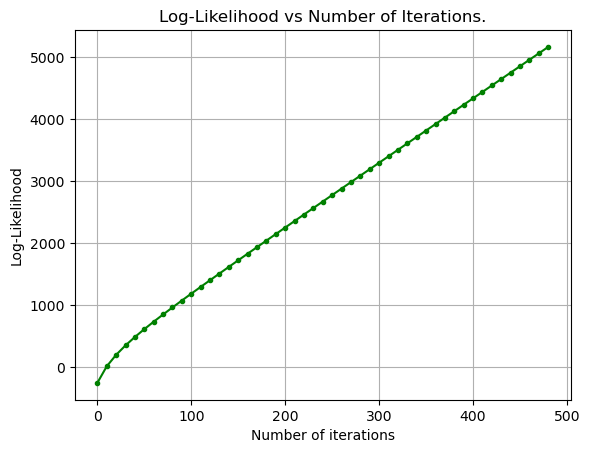

In [44]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,10))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Log-Likelihood')
plt.title("Log-Likelihood vs Number of Iterations.")
plt.grid()
plt.show(block=False)

You should see the likelihood increasing as number of Iterations increase.

### Predict the class label for every example in $X$ for a given ${\bf w}$ and $t$

In [ ]:
# TODO - Given a set of examples write the function to compute predicted which class for each example: 0 if the probability of belonging to class  is < t and returns 1 otherwise) - 10 points
def predict_class(X, w, t):
    classification = hypothesis(X, w)
    return np.where(classification < t, 0, 1).flatten()

In [46]:
grader.check("Q11")

NameError: name 'grader' is not defined

### Precision, recall and F1: Evaluating your hypothesis using the test dataset

In [ ]:
# TODO Q12
# Preidct the class y_hat using X_test and w you just calculated if the threshold is t = 0.5
# First augment the test dataset with a column of ones.
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))
# Now predict the label of each example in your test set
y_hat = predict_class(X_test_1, w, 0.5)

In [48]:
grader.check("Q12")

NameError: name 'grader' is not defined

In [ ]:
# TODO Q13
# Write the precision_recall function by first calculating: false_pos, false_neg and true_pos.  Using these numbers compute the precision and recall
def precision_recall(y_hat, y, threshold):  
    # Calculate false positive and false negative
    # HINT: if done correctly, false_pos should be 1 and false_neg should be 1
    false_pos = np.sum((y_hat == 1) & (y == 0))
    false_neg = np.sum((y_hat == 0) & (y == 1))
    print("false pos:", false_pos)
    print("false neg:", false_neg)

    # Calculate true positive and true negatives
    # HINT: if done correctly, true_pos should be 88
    true_pos = np.sum((y_hat == 1) & (y == 1))
    print("true pos:", true_pos)

    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    return precision,recall

In [50]:
grader.check("Q13")

NameError: name 'grader' is not defined

In [ ]:
# TODO Q14
# Calculate precision and recall using on the test data where the threshold is 0.5

precision, recall = precision_recall(y_hat, y_test, 0.5)

print('Q14 - precision: ', precision)
print('Q14 - recall: ', recall)

false pos: 0
false neg: 8
true pos: 81
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
Q14 - precision:  1.0
Q14 - recall:  0.9101123595505618


In [52]:
grader.check("Q14")

NameError: name 'grader' is not defined

In [53]:
# TODO Q15
# Write the F1_score function
def f1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)

In [54]:
# Computing the F1 score on the test data set using the precision and recall you computed above.
f1_score(precision, recall)

0.9529411764705883

In [55]:
grader.check("Q15")

NameError: name 'grader' is not defined

# Sklearn's implementation of Logistic regression

Next, use Sklearn's implementation of Logistic regression.  Once you have your hypothesis you will use your model on the test data and then evaluate how well it did using Sklearn's built in functions to compute the accuracy, precision, recall and F1 score.

### Fitting Model using Sklearn Library. 

In [ ]:
# TODO - Create object of logistic regression model. So we don't use any regularization, we can set the penalty to `none` or set C to a very large value (for example, C = 100000000), 
# to make lambda (C = 1/lambda) nearly 0.
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty = None)

In [57]:
grader.check("Q16")

NameError: name 'grader' is not defined

In [58]:
# TODO Q17
# Fit the model
# Don't use matrix X_train_1. Instead, use X_train.
logreg.fit(X_train, y_train )

LogisticRegression(penalty=None)

In [ ]:
grader.check("Q17")

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q19
manual: true
points:
  each: 1
-->

In [59]:
# TODO Q18
# Print out all the coefficients
w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

In [ ]:
grader.check("Q19")

<!-- END QUESTION -->

In [60]:
# VERIFY - Compare the parameters computed by logreg model and gradient ascent. They should be nearly same.
print('Q18 - w_logreg: ', w_logreg)
print('Q18 - intercept_logreg: ', intercept_logreg)

Q18 - w_logreg:  [[ 3.21265445e+01 -3.67500814e+01  8.96378206e+01  2.08510804e-01
  -6.62958810e+01  5.59451477e+02 -1.66230805e+02 -4.47828457e+02
   1.46775811e+02 -3.01305135e+02 -5.68784465e+02  9.19162884e+01
   1.05851940e+02 -3.31865228e+02 -9.81284297e+01 -1.36604335e+02
   8.95153556e+01 -1.94703588e+02  2.32709190e+02  3.83006543e+02
  -2.06734995e+02 -2.43403434e+02  1.34920487e+02 -2.11740414e+02
   1.60316007e+02  1.53893713e+02 -4.30161161e+02 -9.42312091e+01
  -4.14308722e+02  1.58362178e+01]]
Q18 - intercept_logreg:  [-71.38178004]


### Performance measure: accuracy

In [62]:
# TODO Q19
# Find the predicted values on test set (X_test not X_test_1) using logreg.predict
y_hat_logreg = logreg.predict(X_test)

# Find the accuracy achieved on test set using logreg.score and y_test 
acc_logreg = logreg.score(X_test, y_test)

print("Q19 - Accuracy on training data = %f" % acc_logreg)

Q19 - Accuracy on training data = 0.944056


In [ ]:
grader.check("Q18")

### Performance Metrics: precision, recall, F1 score


In [63]:
from sklearn.metrics import precision_recall_fscore_support
# TODO Q20
# Find Precision, recall and fscore using precision_recall_fscore_support method of sklearn
# Using y_test and y_hat_logreg
prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_hat_logreg)

In [ ]:
grader.check("Q20")

In [64]:
# VERIFY
print('Q20 - prec: ', prec)
print('Q20 - recal: ', recal)
print('Q20 - fscore: ', fscore)

Q20 - prec:  [0.88333333 0.98795181]
Q20 - recal:  [0.98148148 0.92134831]
Q20 - fscore:  [0.92982456 0.95348837]


# Experiment!  Run your gradient ascent algorithm without scaling the training dataset.  
What did you notice.  Describe the best hyperparamters  you found (i.e. `learning_rate`, and `num_iters`)